# Basic Sentiment Analysis Using the TextBlob Library

## Tweet Sentiment Analysis Using the TextBlob library

### Steps:
1. Import the necessary libraries.
2. Load the CSV file.
3. Fetch the text column from the DataFrame.
4. Extract and remove the handles from the fetched data.
5. Perform sentiment analysis and get the new DataFrame.
6. Join both the DataFrames.
7. Apply appropriate conditions and view positive, negative, and neutral tweet

#importing the necessary libraries 


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from textblob import TextBlob # makes NLP easy



In [2]:
sentence="but you are Late Flight again!! Again and again! Where are the crew?" 
blob =TextBlob(sentence)

In [3]:
blob

TextBlob("but you are Late Flight again!! Again and again! Where are the crew?")

In [4]:
blob.sentiment # testing the sentiment of the sentence

Sentiment(polarity=-0.5859375, subjectivity=0.6)

In [5]:
import re # importing regular expression

In [6]:
pd.set_option("display.max_colwidth", 240)

In [7]:
tweets_data = pd.read_csv("tweets.csv")

In [8]:
#tweets_data.head(3)

In [9]:
#reading the data set and accessing only the text columns
tweets_data= pd.read_csv('tweets.csv', usecols=['text']) #https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

tweets_data


,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it
...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"


In [10]:
#reassigning a name to the text column 
tweets_data.columns=["Tweet"]
tweets_data

,Tweet
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it
...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"


In [11]:
tweets_data.shape

(14640, 1)

#using "tweet.shape" above, this shows only one column has text tweet and it contains 14640 rows

In [12]:
# checking for null values in the rows
tweets_data.isnull().any()

Tweet    False
dtype: bool

In [13]:
# Use extract() function to extract the @ handle (uses a regex to get parts of a string)

tweets_data['handle'] = tweets_data.Tweet.str.extract(r'^(@\S+)')

def remove_handles(Tweet):
  return re.sub(r'@\S+', '', Tweet)

In [14]:
# apply remove handles function and create new tweet_text column
tweets_data['tweet_text'] = tweets_data.Tweet.apply(remove_handles)

In [15]:
tweets_data.head(10)

,Tweet,handle,tweet_text
0,@VirginAmerica What @dhepburn said.,@VirginAmerica,What said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica,plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica,I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica,and it's a really big bad thing about it
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@VirginAmerica,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",@VirginAmerica,"yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",@VirginAmerica,"Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",@virginamerica,"Well, I didn't…but NOW I DO! :-D"
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",@VirginAmerica,"it was amazing, and arrived an hour early. You're too good to me."


# comment!!!
#in line 15, 16 and 18 above,we created a function and pass a Tweet parameter to it. 
#This extracted the special xters (@) from the strings values and as well seperated the text from the handle line 16.
#This resulted to creating another column called tweet_text column that hold the text in line 16
#from the line 18, you will be able to see clearly and understand the speeches/ texts written by tweeters
#and you can see the tweeter handles that made the tweets

In [16]:
#displaying/ accessing the text
tweets_data['tweet_text'].head(10)

0                                                                                                                   What  said.
1                                                                     plus you've added commercials to the experience... tacky.
2                                                                      I didn't today... Must mean I need to take another trip!
3               it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                      and it's a really big bad thing about it
5     seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6                                                              yes, nearly every time I fly VX this “ear worm” won’t go away :)
7                                 Really missed a prime opportunity for Men Without Hats parody, there. 

In [17]:
# create a get_sentiment() function
# accepts a DataFrame and a column as parameters
# this checks if the tweet expresses positive or negative opinion
def get_sentiment(dataframe, column):
  text_column = dataframe[column] 
  #apply TextBlob constructor to each value of text_column
  textblob_sentiment = text_column.apply(TextBlob)
  # extracts and creates a new DataFrame for Polarity and subjectivity columns
  sentiment_values = [ {'Polarity': v.sentiment.polarity,'Subjectivity': v.sentiment.subjectivity}
                      for v in textblob_sentiment.values]
  return pd.DataFrame(sentiment_values)

In [18]:
sentiment_frame = get_sentiment(tweets_data, 'tweet_text')
sentiment_frame

,Polarity,Subjectivity
0,0.000000,0.000000
1,0.000000,0.000000
2,-0.390625,0.687500
3,0.006250,0.350000
4,-0.350000,0.383333
...,...,...
14635,0.000000,0.600000
14636,-0.300000,0.600000
14637,0.000000,0.000000
14638,-0.125000,0.375000


###**Data Visualization & Exploration**

In [19]:
#importing the necessary libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns

%matplotlib inline


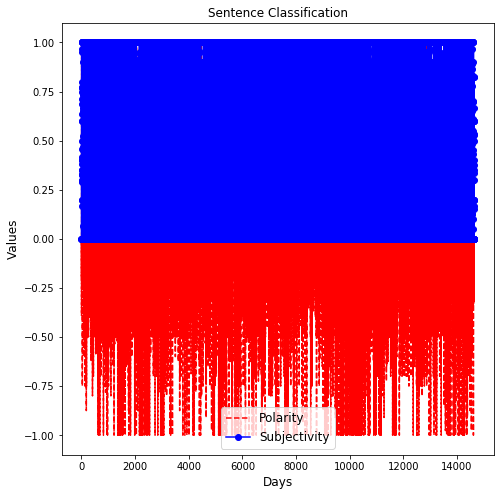

In [20]:
font =12
fig= plt.figure(figsize=(6,6))
axx=fig.add_axes([0,0,1,1])
axx.plot(sentiment_frame['Polarity'],'--r')
axx.plot(sentiment_frame['Subjectivity'],'-ob')


axx.legend(['Polarity', 'Subjectivity'],fontsize = font)
axx.set_xlabel('Days', fontsize =font)
axx.set_ylabel('Values', fontsize =font)
axx.set_title('Sentence Classification', fontsize =font)
#to save
fig.savefig('sentence.png')
plt.show()


#from these visulization, it can be seen that there is more negative tweet than the positive.
#That is the polarity is lower compare to subjectivity

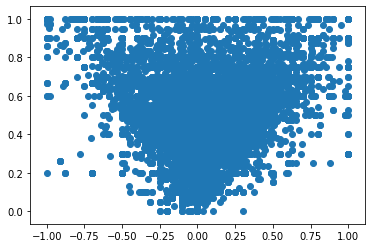

In [21]:
plt.scatter(sentiment_frame.Polarity,sentiment_frame.Subjectivity)
plt.show()

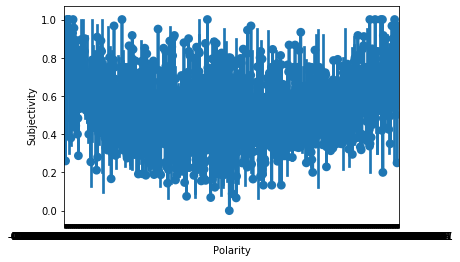

In [22]:
# checking with histogram 

sns.pointplot(x="Polarity", y="Subjectivity", data=sentiment_frame)
plt.show()


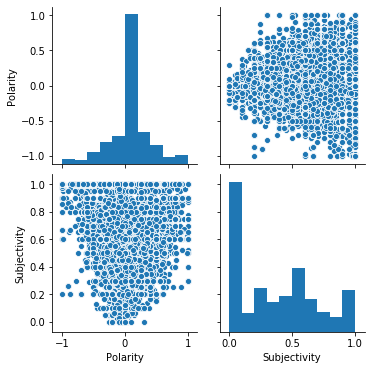

In [23]:
sns.pairplot( data=sentiment_frame)

In [24]:
# adding the tweet_data dataframe to sentiment_frame data frame
tweets_add = pd.concat([tweets_data, sentiment_frame], axis=1) # replacing the columns with numbers
tweets_add.head()

,Tweet,handle,tweet_text,Polarity,Subjectivity
0,@VirginAmerica What @dhepburn said.,@VirginAmerica,What said.,0.000000,0.000000
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica,plus you've added commercials to the experience... tacky.,0.000000,0.000000
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica,I didn't today... Must mean I need to take another trip!,-0.390625,0.687500
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0.006250,0.350000
4,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica,and it's a really big bad thing about it,-0.350000,0.383333


### **Data Modelling**

In [25]:
#renaming the data set
tweets = tweets_add

tweets.head()


,Tweet,handle,tweet_text,Polarity,Subjectivity
0,@VirginAmerica What @dhepburn said.,@VirginAmerica,What said.,0.000000,0.000000
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica,plus you've added commercials to the experience... tacky.,0.000000,0.000000
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica,I didn't today... Must mean I need to take another trip!,-0.390625,0.687500
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0.006250,0.350000
4,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica,and it's a really big bad thing about it,-0.350000,0.383333


In [26]:
#exporting the updated file
tweets.to_csv("tested_tweets.csv")

In [27]:
#Rem: polarity was in capital letter P
positive_tweets = tweets[tweets.Polarity > 0.5]
negative_tweets=tweets[tweets.Polarity <= -0.5]
neutral_tweets=tweets[(tweets.Polarity > -0.5) & (tweets.Polarity<0.5)]

### filtering out all the  tweets seperately.

In [28]:

negative_tweets

,Tweet,handle,tweet_text,Polarity,Subjectivity
33,"@VirginAmerica awaiting my return phone call, just would prefer to use your online self-service option :(",@VirginAmerica,"awaiting my return phone call, just would prefer to use your online self-service option :(",-0.750000,1.000000
84,@VirginAmerica it was a disappointing experience which will be shared with every business traveler I meet. #neverflyvirgin,@VirginAmerica,it was a disappointing experience which will be shared with every business traveler I meet. #neverflyvirgin,-0.600000,0.700000
87,@VirginAmerica Random Q: what's the distribution of elevate avatars? I bet that kitty has a disproportionate share http://t.co/APtZpuROp4,@VirginAmerica,Random Q: what's the distribution of elevate avatars? I bet that kitty has a disproportionate share http://t.co/APtZpuROp4,-0.500000,0.500000
97,@VirginAmerica - Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable,@VirginAmerica,- Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable,-0.500000,1.000000
99,@VirginAmerica is anyone doing anything there today? Website is useless and no one is answering the phone.,@VirginAmerica,is anyone doing anything there today? Website is useless and no one is answering the phone.,-0.500000,0.200000
...,...,...,...,...,...
14483,@AmericanAir The bad weather wasn't a surprise! You should have double/triple staff on hand to handle calls. Way to treat your customers.,@AmericanAir,The bad weather wasn't a surprise! You should have double/triple staff on hand to handle calls. Way to treat your customers.,-0.875000,0.666667
14507,"@AmericanAir i dont believe it, it has been impossible for your agents to get an update from the delivery company since yesterday at 11 am",@AmericanAir,"i dont believe it, it has been impossible for your agents to get an update from the delivery company since yesterday at 11 am",-0.666667,1.000000
14535,@AmericanAir Flight Cancelled Flighted and rebooked but agent made a mistake and booked wrong date! Been trying to get through via phone for hours!!,@AmericanAir,Flight Cancelled Flighted and rebooked but agent made a mistake and booked wrong date! Been trying to get through via phone for hours!!,-0.976562,0.900000
14568,@AmericanAir i was spoken 2 like I'm an idiot and that is not OK!! I don't need to deal w/ that esp after the travel experience I've had,@AmericanAir,i was spoken 2 like I'm an idiot and that is not OK!! I don't need to deal w/ that esp after the travel experience I've had,-0.595313,0.650000


In [29]:
positive_tweets

,Tweet,handle,tweet_text,Polarity,Subjectivity
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",@virginamerica,"Well, I didn't…but NOW I DO! :-D",1.000000,1.000000
19,@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.,@VirginAmerica,you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.,0.600000,0.966667
22,@VirginAmerica I love the hipster innovation. You are a feel good brand.,@VirginAmerica,I love the hipster innovation. You are a feel good brand.,0.600000,0.600000
34,@VirginAmerica this is great news! America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @Pacificbiznews,@VirginAmerica,this is great news! America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via,1.000000,0.750000
35,Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP,NaN,Nice RT Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP,0.600000,1.000000
...,...,...,...,...,...
14566,"@AmericanAir i was also told by agents my issues ""aren't their prob"" K fine. I get it. But have some compassion 4 others dealing w/this!!!",@AmericanAir,"i was also told by agents my issues ""aren't their prob"" K fine. I get it. But have some compassion 4 others dealing w/this!!!",0.813802,0.500000
14577,@AmericanAir I have never on all my trips on any airline ever nat'l or int'l ever experienced anything like this!,@AmericanAir,I have never on all my trips on any airline ever nat'l or int'l ever experienced anything like this!,1.000000,0.900000
14587,@AmericanAir I’ll play it by ear. I know that you are doing your best. Buy some chewey oatmeal cookies for your customer care folks.,@AmericanAir,I’ll play it by ear. I know that you are doing your best. Buy some chewey oatmeal cookies for your customer care folks.,1.000000,0.300000
14625,@AmericanAir Flight 236 was great. Fantastic cabin crew. A+ landing. #thankyou #JFK http://t.co/dRW08djHAI,@AmericanAir,Flight 236 was great. Fantastic cabin crew. A+ landing. #thankyou #JFK http://t.co/dRW08djHAI,0.600000,0.825000


In [30]:
neutral_tweets

,Tweet,handle,tweet_text,Polarity,Subjectivity
0,@VirginAmerica What @dhepburn said.,@VirginAmerica,What said.,0.000000,0.000000
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica,plus you've added commercials to the experience... tacky.,0.000000,0.000000
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica,I didn't today... Must mean I need to take another trip!,-0.390625,0.687500
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0.006250,0.350000
4,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica,and it's a really big bad thing about it,-0.350000,0.383333
...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,@AmericanAir,thank you we got on a different flight to Chicago.,0.000000,0.600000
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,@AmericanAir,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,-0.300000,0.600000
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,@AmericanAir,Please bring American Airlines to #BlackBerry10,0.000000,0.000000
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",@AmericanAir,"you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",-0.125000,0.375000


In [31]:
#exporting the negative, postive and neutral tweets
negative_tweets.to_csv("negative_tweets.csv")
positive_tweets.to_csv("positive_tweets.csv")
neutral_tweets.to_csv("neutral_tweets.csv")

summary:

from the data set, it was observed that the positive tweet has the highest with the total of 1047 rows,
negative tweet has 828 rows while the neutral tweet  has 12315 rows.
this indicates that in the US tweets, people with positive tweets are more than the negative. which means people who are sensitive to the use of words are more than the negative. 

# understanding data for sentiment analysis

#### loading the data set for sentiment analysis and importing the necessasry libraries

In [32]:
import pandas as pd


In [33]:
IMDB_DATA_FILE = "imdb_labelled.txt"
YELP_DATA_FILE ="yelp_labelled.txt"


In [35]:
#download from https://www.kaggle.com/datasets/haithemhermessi/sentiment-labelled-sentences-data-set
IMDB_DATA_FILE = 'imdb_labelled.txt'
YELP_DATA_FILE = 'yelp_labelled.txt'
AMAZON_DATA_FILE = 'amazon_cells_labelled.txt'
COLUMN_NAMES = ['Review', 'Sentiment']